In [1]:
import json
import os
import seaborn as sb
import pandas as pd

In [2]:
hal_data = {"year": [], "commit_sha": [],
        "file_name": [],
        "h_volume": [],
        "h_length": [],
        "h_voc": [],
        "distinct_operators": [],
        "distinct_operands": []
        }

for file in os.scandir("data/halstead/"):
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for source_file in data_file:

            hal_data["year"].append(int(file.name[:4]))
            hal_data["commit_sha"].append(file.name[9:16])
            hal_data["file_name"].append(source_file)
            hal_data["h_volume"].append(data_file[source_file]["h_volume"])

            hal_data["h_length"].append(data_file[source_file]["h_length"])
            hal_data["h_voc"].append(data_file[source_file]["h_voc"])
            hal_data["distinct_operators"].append(data_file[source_file]["distinct_operators"])
            hal_data["distinct_operands"].append(data_file[source_file]["distinct_operands"])

hal_data = pd.DataFrame(hal_data)
hal_data

,year,commit_sha,file_name,h_volume,h_length,h_voc,distinct_operators,distinct_operands
0,2012,3b62de3,activity_estimation.c,31025.556223,4197,168,60,108
1,2012,3b62de3,ast_optimizations.c,7311.103044,1129,89,51,38
2,2012,3b62de3,ast_util.c,37973.897716,5102,174,80,94
3,2012,3b62de3,errors.c,1236.784119,234,39,25,14
4,2012,3b62de3,hard_blocks.c,9167.987844,1386,98,44,54
...,...,...,...,...,...,...,...,...
386,2022,a6538ac,subtractions.cpp,39914.709148,5165,212,77,135
387,2022,a6538ac,Verilog.cpp,-1.000000,0,0,0,0
388,2022,a6538ac,VerilogReader.cpp,256.763925,54,27,20,7
389,2022,a6538ac,VerilogWriter.cpp,3803.282445,570,102,45,57


In [3]:
hal_data[hal_data["year"] == "2017"]

,year,commit_sha,file_name,h_volume,h_length,h_voc,distinct_operators,distinct_operands


<AxesSubplot:xlabel='year', ylabel='h_volume'>

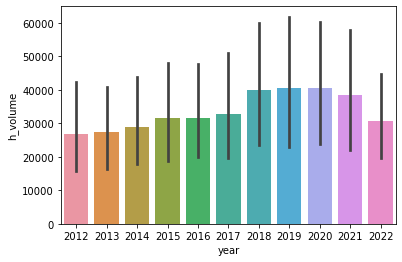

In [4]:
sb.barplot(data=hal_data, x="year", y="h_volume")

<AxesSubplot:xlabel='year', ylabel='distinct_operators'>

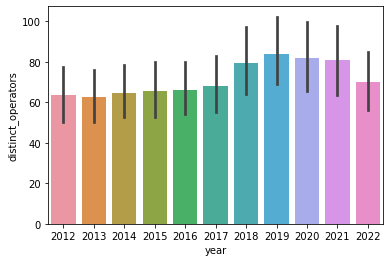

In [5]:
sb.barplot(data=hal_data, x="year", y="distinct_operators")

<AxesSubplot:xlabel='year', ylabel='distinct_operands'>

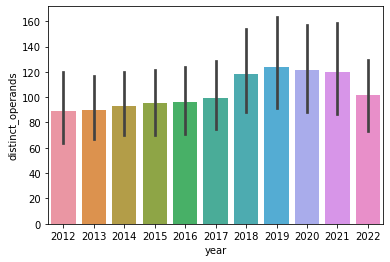

In [6]:
sb.barplot(data=hal_data, x="year", y="distinct_operands")

<AxesSubplot:xlabel='year', ylabel='h_length'>

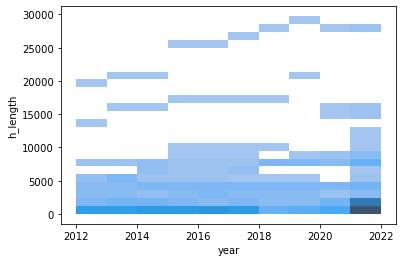

In [7]:
sb.histplot(data=hal_data, x="year", y="h_length")

In [8]:
list(hal_data.groupby("year").mean()["h_volume"])

[26707.969459712953,
 27466.35231370475,
 29060.807688286724,
 31672.221139779278,
 31579.44772493396,
 32716.126554920276,
 40105.25925322823,
 40702.89490866846,
 40436.954096403984,
 38501.08374466712,
 30805.544247596452]

[ 0  1  2  3  4  5  6  7  8  9 10]


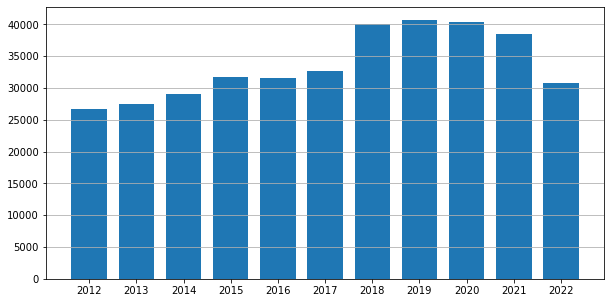

In [9]:
from matplotlib import pyplot as plt, rcParams
import numpy as np
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(hal_data.groupby("year")))
width = .75
print(ind)
years = [2012, 2013, 2014,2015, 2016,2017,2018,2019,2020,2021, 2022]
axes.bar(ind, list(hal_data.groupby("year").mean()["h_volume"]), width, label="SLOC")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.grid(visible=True, axis="y")

[ 0  1  2  3  4  5  6  7  8  9 10]


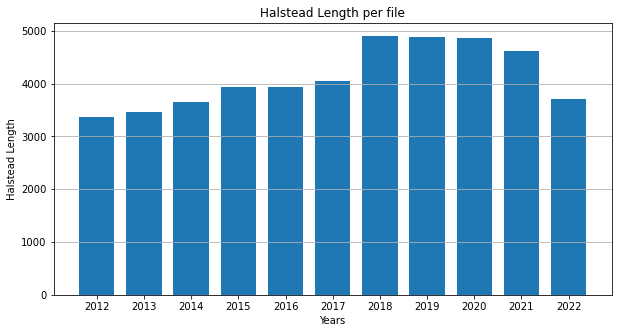

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(hal_data.groupby("year")))
width = .75
print(ind)
years = [2012, 2013, 2014,2015, 2016,2017,2018,2019,2020,2021, 2022]
axes.bar(ind, list(hal_data.groupby("year").mean()["h_length"]), width, label="SLOC")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_ylabel("Halstead Length")
axes.set_xlabel("Years")
axes.set_title("Halstead Length per file")
axes.grid(visible=True, axis="y")
fig.savefig("figures/halstead/h_length_per_file")

In [23]:
years = [2012, 2013, 2014,2015, 2016,2017,2018,2019,2020,2021, 2022]
cum_h_length = []
for i in years:
    length_year = 0
    for value in hal_data[hal_data["year"] == i]["h_length"]:
        length_year += value
    cum_h_length.append(length_year)
cum_h_length

def cumulate_column(year: list, column: str) -> list:
    res = []
    for i in year:
        tmp = 0
        for value in hal_data[hal_data["year"] == i][column]:
            tmp += value
        res.append(tmp)
    return res
cum_distict_operants = cumulate_column(years, "distinct_operators")
cum_distict_operands = cumulate_column(years, "distinct_operands")
cum_voc = cumulate_column(years, "h_voc")

In [12]:
h_length_increase = []
for i in range(len(cum_h_length) - 1):
    print(i)
    h_length_increase.append((cum_h_length[i + 1]-cum_h_length[i])/cum_h_length[i])
h_length_increase

0
1
2
3
4
5
6
7
8
9


[0.12399618387780999,
 0.11443757725587145,
 0.07861014367369877,
 0.02367208709243974,
 0.004667796224241735,
 -0.052113746350437945,
 0.031884669479606186,
 0.025801790995951857,
 0.010729471166622376,
 0.2670457159759424]

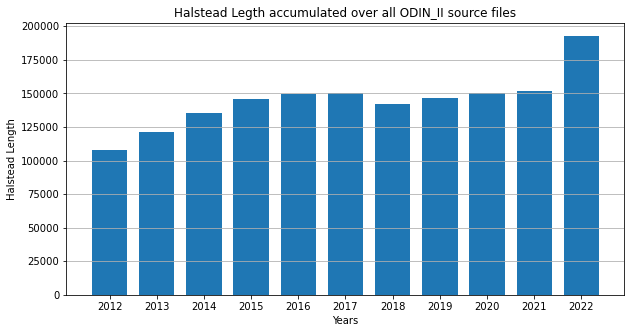

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(hal_data.groupby("year")))
width = .75
years = [2012, 2013, 2014,2015, 2016,2017,2018,2019,2020,2021, 2022]
axes.bar(ind, cum_h_length, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Halstead Length")
axes.set_title("Halstead Legth accumulated over all ODIN_II source files")
fig.savefig("figures/halstead/whole_h_length.jpg")

Text(0.5, 1.0, 'Halstead Legth accumulated over all ODIN_II source files')

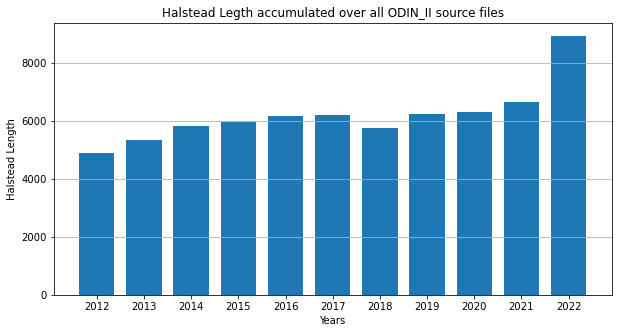

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(hal_data.groupby("year")))
width = .75
years = [2012, 2013, 2014,2015, 2016,2017,2018,2019,2020,2021, 2022]
axes.bar(ind, cum_voc, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Halstead Length")
axes.set_title("Halstead Legth accumulated over all ODIN_II source files")

[2030, 2189, 2383, 2425, 2520, 2518, 2310, 2514, 2539, 2675, 3630]


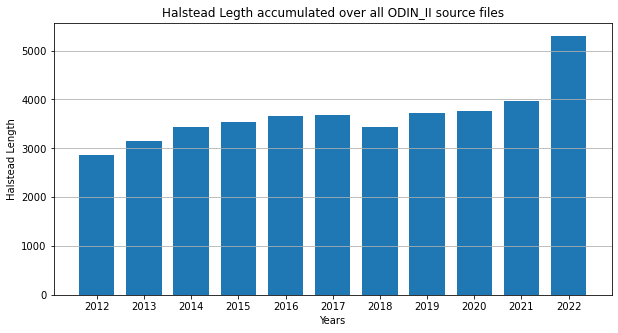

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ind = np.arange(len(years))
width = .75
years = [2012, 2013, 2014,2015, 2016,2017,2018,2019,2020,2021, 2022]
print(cum_distict_operants)
axes.bar(ind, cum_distict_operands, width)
axes.grid(visible=True, axis="y")
axes.set_xticks(ticks=np.array(range(len(years))))
axes.set_xticklabels(years)
axes.set_xlabel("Years")
axes.set_ylabel("Halstead Length")
axes.set_title("Halstead Legth accumulated over all ODIN_II source files")
fig.savefig("figures/halstead/whole_h_length.jpg")

In [15]:
scc_data = {"year": [], "commit_sha": [], "total_lines": [], "code_lines": [],
        "blank_lines": [],
        "comment_lines": [],
        "complexity": [],
        }
for file in os.scandir("data/LOC_and_Complexity"):
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for language in data_file:
            if language["Name"] == "C" or language["Name"] == "C++":
                print(language)
                #appends last so order is maintained
                scc_data["year"].append(file.name[:4])
                scc_data["commit_sha"].append(file.name[9:16])
                scc_data["total_lines"].append(language["Lines"])
                scc_data["blank_lines"].append(language["Blank"])
                scc_data["comment_lines"].append(language["Comment"])
                scc_data["code_lines"].append(language["Code"])
                scc_data["complexity"].append(language["Complexity"])

scc_data

scc_data = pd.DataFrame(scc_data)
scc_data

{'Name': 'C', 'Bytes': 851678, 'CodeBytes': 0, 'Lines': 25631, 'Code': 17778, 'Comment': 4609, 'Blank': 3244, 'Complexity': 4079, 'Count': 32, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 934718, 'CodeBytes': 0, 'Lines': 28353, 'Code': 19825, 'Comment': 5016, 'Blank': 3512, 'Complexity': 4667, 'Count': 35, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1012838, 'CodeBytes': 0, 'Lines': 31195, 'Code': 22093, 'Comment': 5255, 'Blank': 3847, 'Complexity': 5422, 'Count': 37, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1099575, 'CodeBytes': 0, 'Lines': 33049, 'Code': 23333, 'Comment': 5630, 'Blank': 4086, 'Complexity': 5879, 'Count': 37, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1130411, 'CodeBytes': 0, 'Lines': 33954, 'Code': 23842, 'Comment': 5847, 'Blank': 4265, 'Complexity': 6004, 'Count': 38, 'WeightedComplexity': 0, 'Files': []}
{'Name': 'C', 'Bytes': 1128557, 'CodeBytes': 0, 'Lines': 33726, 'Code': 23712, 'Comment': 57

,year,commit_sha,total_lines,code_lines,blank_lines,comment_lines,complexity
0,2012,3b62de3,25631,17778,3244,4609,4079
1,2013,f044635,28353,19825,3512,5016,4667
2,2014,c34dd6b,31195,22093,3847,5255,5422
3,2015,67bd7d4,33049,23333,4086,5630,5879
4,2016,c23ead2,33954,23842,4265,5847,6004
5,2017,7ab96cc,33726,23712,4241,5773,5904
6,2018,b29110c,31529,22149,4040,5340,5571
7,2019,b8b04e3,33607,23056,4463,6088,5911
8,2020,bb51a8b,31248,20497,4386,6365,6381
9,2021,827170f,32017,20976,4488,6553,6474


In [16]:
scc_data["percent_comment"] = scc_data["comment_lines"] / scc_data["total_lines"]

scc_data

,year,commit_sha,total_lines,code_lines,blank_lines,comment_lines,complexity,percent_comment
0,2012,3b62de3,25631,17778,3244,4609,4079,0.179821
1,2013,f044635,28353,19825,3512,5016,4667,0.176912
2,2014,c34dd6b,31195,22093,3847,5255,5422,0.168456
3,2015,67bd7d4,33049,23333,4086,5630,5879,0.170353
4,2016,c23ead2,33954,23842,4265,5847,6004,0.172204
5,2017,7ab96cc,33726,23712,4241,5773,5904,0.171174
6,2018,b29110c,31529,22149,4040,5340,5571,0.169368
7,2019,b8b04e3,33607,23056,4463,6088,5911,0.181153
8,2020,bb51a8b,31248,20497,4386,6365,6381,0.203693
9,2021,827170f,32017,20976,4488,6553,6474,0.204673


In [17]:

scc_data["percent_comment"]

0     0.179821
1     0.176912
2     0.168456
3     0.170353
4     0.172204
5     0.171174
6     0.169368
7     0.181153
8     0.203693
9     0.204673
10    0.257305
Name: percent_comment, dtype: float64

In [18]:
loc_file_tracking = {"year": [],
                     "loc_per_file": [],
                     "complex_per_file": [],
                     "comment_per_file": [],
                     "blank_per_file": [],
                     "filename": []}
for file in os.scandir("data/LOC_and_Complexity/byfile"):
    file_year = file.name[:4]
    if file.is_file and file.name.endswith(".json"):
        data_file = open(file)
        data_file = json.load(data_file)
        for odin_file in data_file:
            if odin_file["Name"] == "C" or odin_file["Name"] == "C++":
                for stats_file in odin_file["Files"]:
                    filename, filetype = stats_file["Filename"].split(".")
                    loc_file_tracking["year"].append(file_year)
                    loc_file_tracking["loc_per_file"].append(stats_file["Lines"])
                    loc_file_tracking["complex_per_file"].append(stats_file["Complexity"])
                    loc_file_tracking["filename"].append(stats_file["Filename"])
                    loc_file_tracking["comment_per_file"].append(stats_file["Comment"])
                    loc_file_tracking["blank_per_file"].append(stats_file["Blank"])
loc_file_tracking = pd.DataFrame(loc_file_tracking)
loc_file_tracking

,year,loc_per_file,complex_per_file,comment_per_file,blank_per_file,filename
0,2012,344,51,74,31,ast_optimizations.c
1,2012,89,16,30,10,errors.c
2,2012,113,7,22,16,queue.c
3,2012,876,186,143,119,activity_estimation.c
4,2012,199,13,22,29,hashtable.c
...,...,...,...,...,...,...
386,2022,206,36,74,21,LogicalOps.cpp
387,2022,488,0,48,15,enum_str.cpp
388,2022,716,73,343,74,Division.cpp
389,2022,646,40,307,76,FlipFlop.cpp


In [19]:
loc_file_tracking.groupby("year").mean()

,loc_per_file,complex_per_file,comment_per_file,blank_per_file
year,,,,
2012,800.968750,127.468750,144.031250,101.375000
2013,810.085714,133.342857,143.314286,100.342857
2014,843.108108,146.540541,142.027027,103.972973
2015,893.216216,158.891892,152.162162,110.432432
2016,893.526316,158.000000,153.868421,112.236842
2017,911.513514,159.567568,156.027027,114.621622
2018,1087.206897,192.103448,184.137931,139.310345
2019,1120.233333,197.033333,202.933333,148.766667
2020,1008.000000,205.838710,205.322581,141.483871
